In [2]:
import numpy as np
import pandas as pd
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator
import openslide
import matplotlib.pyplot as plt
import os
from glob import glob
pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)

In [3]:
SLIDE_FOLDER_PATH = "../data/slides"

In [4]:
slides = [open_slide(y) for x in os.walk(SLIDE_FOLDER_PATH) for y in glob(os.path.join(x[0], '*.svs'))]

In [5]:
 
pd.DataFrame([(float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER]),
               float(slide.properties[openslide.PROPERTY_NAME_MPP_X])) for slide in slides], columns=['mag', 'MPP'])

,mag,MPP
0,40.0,0.2520
1,40.0,0.2468
2,20.0,0.2325
3,40.0,0.2520
4,40.0,0.2520
5,20.0,0.2325
6,40.0,0.2520
7,40.0,0.2520
8,40.0,0.2520
9,40.0,0.2520


In [6]:
df_prop = pd.DataFrame([slide.properties for slide in slides])
df_prop

,aperio.AppMag,aperio.DSR ID,aperio.Date,aperio.DisplayColor,aperio.Exposure Scale,aperio.Exposure Time,aperio.Filename,aperio.Focus Offset,aperio.ICC Profile,aperio.ImageID,aperio.Left,aperio.LineAreaXOffset,aperio.LineAreaYOffset,aperio.LineCameraSkew,aperio.MPP,aperio.OriginalHeight,aperio.OriginalWidth,aperio.Parmset,aperio.ScanScope ID,aperio.StripeWidth,aperio.Time,aperio.Time Zone,aperio.Title,aperio.Top,aperio.User,openslide.comment,openslide.level-count,openslide.level[0].downsample,openslide.level[0].height,openslide.level[0].tile-height,openslide.level[0].tile-width,openslide.level[0].width,openslide.level[1].downsample,openslide.level[1].height,openslide.level[1].tile-height,openslide.level[1].tile-width,openslide.level[1].width,openslide.level[2].downsample,openslide.level[2].height,openslide.level[2].tile-height,openslide.level[2].tile-width,openslide.level[2].width,openslide.level[3].downsample,openslide.level[3].height,openslide.level[3].tile-height,openslide.level[3].tile-width,openslide.level[3].width,openslide.mpp-x,openslide.mpp-y,openslide.objective-power,openslide.quickhash-1,openslide.vendor,tiff.ImageDescription,tiff.ResolutionUnit
0,40,aperio01,09/11/12,0,0.000001,109,28717,0.000000,ScanScope v1,28717,22.279078,0.000000,0.000000,-0.000389,0.2520,24655,136000,EPC,SS1302,1000,20:02:44,GMT-07:00,NaN,16.236982,c2338051-fa23-4d8c-a6dd-e2a3b10c60ca,Aperio Image Library vFS90 01\r\n136000x24655 ...,4,1,24555,256,256,130457,4.0002597101161541,6138,256,256,32614,16.004137341722863,1534,256,256,8153,64.062269234415567,383,256,256,2038,0.252,0.252,40,f5fcabb7aeaeb78ae0b50ea37044700c8909f816135898...,aperio,Aperio Image Library vFS90 01\r\n136000x24655 ...,inch
1,40,resc3-dsr2,08/18/11,0,0.000001,109,TCGA-DY-A0XA-01Z-00-DX1,-0.000500,ScanScope v1,74894,12.584850,0.006927,-0.001649,-0.000950,0.2468,92544,113088,GOG136 on RESBPCLACIE01,SS1552CNTLR,992,19:38:46,GMT-04:00,TCGA-DY-A0XA-01Z-00-DX1,23.348885,ecdd28ad-c156-49f5-836e-079e189eb033,Aperio Image Library v10.2.41\r\n113088x92544 ...,4,1,92444,240,240,108528,4,23111,240,240,27132,16.001038601350182,5777,240,240,6783,32.00720683151016,2888,240,240,3391,0.24679999999999999,0.24679999999999999,40,NaN,aperio,Aperio Image Library v10.2.41\r\n113088x92544 ...,inch
2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aperio Image Library v11.0.37\r\n83200x105728 ...,4,1,105728,256,256,83200,4,26432,256,256,20800,16,6608,256,256,5200,64,1652,256,256,1300,0.23250000000000001,0.23250000000000001,20,cfff3578ccbb53e1d9c69e1723a9754a2a10f9320ffefa...,aperio,Aperio Image Library v11.0.37\r\n83200x105728 ...,inch
3,40,aperio01,10/22/11,0,0.000001,109,27330,0.000000,ScanScope v1,27330,21.049488,0.000000,0.000000,-0.000389,0.2520,52563,74000,EPC,SS1302,1000,21:43:44,GMT-07:00,NaN,13.627176,d42c5d45-ab0a-4796-8800-057eb80bb1b9,Aperio Image Library v10.2.41\r\n74000x52563 [...,4,1,52463,256,256,70984,4.0001143728555091,13115,256,256,17746,16.003189693731088,3278,256,256,4436,32.006379387462175,1639,256,256,2218,0.252,0.252,40,c402bfb849cdcfab5e4f407ce8da39eebaa05335aa6e98...,aperio,Aperio Image Library v10.2.41\r\n74000x52563 [...,inch
4,40,aperio01,10/19/11,0,0.000001,109,27170,0.000000,ScanScope v1,27170,19.235285,0.000000,0.000000,-0.000389,0.2520,82667,129000,EPC,SS1302,1000,05:49:26,GMT-07:00,NaN,21.118515,954f2669-b0d3-4e6c-9af2-f182f725b5e6,Aperio Image Library v10.2.41\r\n129000x82667 ...,4,1,82567,256,256,123742,4.0001049967422411,20641,256,256,30935,16.001583506005169,5160,256,256,7733,32.005236568454066,2580,256,256,3866,0.252,0.252,40,402bd206192c8f549b0fd0a76b45f3de1ea91d6e132e62...,aperio,Aperio Image Library v10.2.41\r\n129000x82667 ...,inch
5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aperio Image Library v11.0.37\r\n65280x109312 ...,4,1,109312,256,256,65280,4,27328,256,256,16320,16,6832,256,256,4080,64,1708,256,256,1020,0.23250000000000001,0.23250000000

In [7]:
df_prop[['aperio.AppMag', 'aperio.DSR ID', 'aperio.MPP', 'aperio.OriginalHeight', 'aperio.OriginalWidth',
        'openslide.level[0].height', 'openslide.level[0].width', 'openslide.level[1].downsample',
        'openslide.level[2].downsample', 'openslide.level[3].downsample']]

,aperio.AppMag,aperio.DSR ID,aperio.MPP,aperio.OriginalHeight,aperio.OriginalWidth,openslide.level[0].height,openslide.level[0].width,openslide.level[1].downsample,openslide.level[2].downsample,openslide.level[3].downsample
0,40,aperio01,0.2520,24655,136000,24555,130457,4.0002597101161541,16.004137341722863,64.062269234415567
1,40,resc3-dsr2,0.2468,92544,113088,92444,108528,4,16.001038601350182,32.00720683151016
2,20,NaN,0.23250,NaN,NaN,105728,83200,4,16,64
3,40,aperio01,0.2520,52563,74000,52463,70984,4.0001143728555091,16.003189693731088,32.006379387462175
4,40,aperio01,0.2520,82667,129000,82567,123742,4.0001049967422411,16.001583506005169,32.005236568454066
5,20,NaN,0.23250,NaN,NaN,109312,65280,4,16,64
6,40,aperio01,0.2520,69664,120000,69564,115109,4.0000173749869692,16.00172777406523,32.007137729567297
7,40,aperio01,0.2520,69642,85000,69542,81535,4.0001311115886882,16.002162321325102,32.00746617073478
8,40,aperio01,0.2520,58051,94000,57951,90169,4.0001257219238475,16.002869831337311,32.013000880604537
9,40,aperio01,0.2520,58239,118000,58139,113191,4.0001562154278556,16.002008669936568,32.008423459862321


In [8]:
256/0.2520

1015.8730158730159

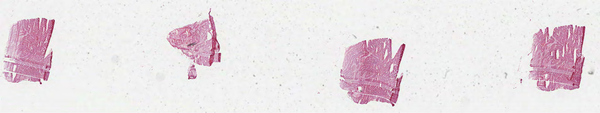

In [12]:
slide_thumb_600 = slides[0].get_thumbnail(size=(600, 600))
slide_thumb_600

In [18]:
slide.level_dimensions

((115109, 69564), (28777, 17391), (7194, 4347), (3597, 2173))

In [19]:
slide.level_downsamples

(1.0, 4.000017374986969, 16.00172777406523, 32.0071377295673)

In [14]:
slide.resize

AttributeError: 'OpenSlide' object has no attribute 'resize'